<a href="https://colab.research.google.com/github/malyadri6761/spammail/blob/main/spam_mail_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy seaborn matplotlib wordcloud scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [12]:
# Load and preprocess the dataset
data = pd.read_csv('/content/spam_ham_dataset.csv')
data.dropna(inplace=True)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

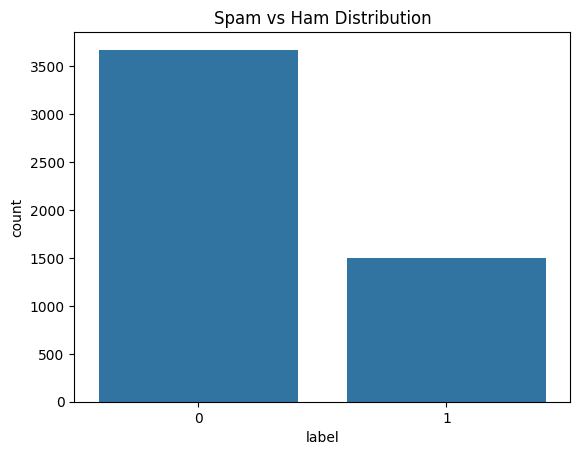

In [13]:
# Visualize class distribution
sns.countplot(x='label', data=data)
plt.title('Spam vs Ham Distribution')
plt.show()


In [14]:
# Split the dataset
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [16]:
# Store results for each model
results = {}


In [17]:
### Logistic Regression
print("Logistic Regression")
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test_tfidf)[:, 1])
results['Logistic Regression'] = {'Accuracy': accuracy_lr, 'ROC AUC': roc_auc_lr}
print(f"Accuracy: {accuracy_lr:.4f}, ROC AUC: {roc_auc_lr:.4f}")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.9903, ROC AUC: 0.9985
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

[[736   6]
 [  4 289]]


In [18]:
### Naive Bayes
print("\nNaive Bayes")
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test_tfidf)[:, 1])
results['Naive Bayes'] = {'Accuracy': accuracy_nb, 'ROC AUC': roc_auc_nb}
print(f"Accuracy: {accuracy_nb:.4f}, ROC AUC: {roc_auc_nb:.4f}")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes
Accuracy: 0.9246, ROC AUC: 0.9980
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035

[[741   1]
 [ 77 216]]


In [19]:
### Support Vector Machine (SVM)
print("\nSupport Vector Machine")
svm = SVC(probability=True)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test_tfidf)[:, 1])
results['SVM'] = {'Accuracy': accuracy_svm, 'ROC AUC': roc_auc_svm}
print(f"Accuracy: {accuracy_svm:.4f}, ROC AUC: {roc_auc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.9913, ROC AUC: 0.9991
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

[[735   7]
 [  2 291]]


In [20]:
### Random Forest
print("\nRandom Forest")
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_tfidf)[:, 1])
results['Random Forest'] = {'Accuracy': accuracy_rf, 'ROC AUC': roc_auc_rf}
print(f"Accuracy: {accuracy_rf:.4f}, ROC AUC: {roc_auc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



Random Forest
Accuracy: 0.9787, ROC AUC: 0.9978
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.94      0.99      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035

[[724  18]
 [  4 289]]


In [21]:
### Voting Classifier (Ensemble)
print("\nVoting Classifier (Ensemble)")
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('nb', MultinomialNB()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
], voting='soft')

voting_clf.fit(X_train_tfidf, y_train)
y_pred_voting = voting_clf.predict(X_test_tfidf)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, voting_clf.predict_proba(X_test_tfidf)[:, 1])
results['Voting Classifier'] = {'Accuracy': accuracy_voting, 'ROC AUC': roc_auc_voting}
print(f"Accuracy: {accuracy_voting:.4f}, ROC AUC: {roc_auc_voting:.4f}")
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))


Voting Classifier (Ensemble)
Accuracy: 0.9923, ROC AUC: 0.9990
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       742
           1       0.99      0.98      0.99       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

[[739   3]
 [  5 288]]


In [22]:
# Summary of results
print("\nSummary of Model Performance")
for model, metrics in results.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.4f}, ROC AUC = {metrics['ROC AUC']:.4f}")


Summary of Model Performance
Logistic Regression: Accuracy = 0.9903, ROC AUC = 0.9985
Naive Bayes: Accuracy = 0.9246, ROC AUC = 0.9980
SVM: Accuracy = 0.9913, ROC AUC = 0.9991
Random Forest: Accuracy = 0.9787, ROC AUC = 0.9978
Voting Classifier: Accuracy = 0.9923, ROC AUC = 0.9990


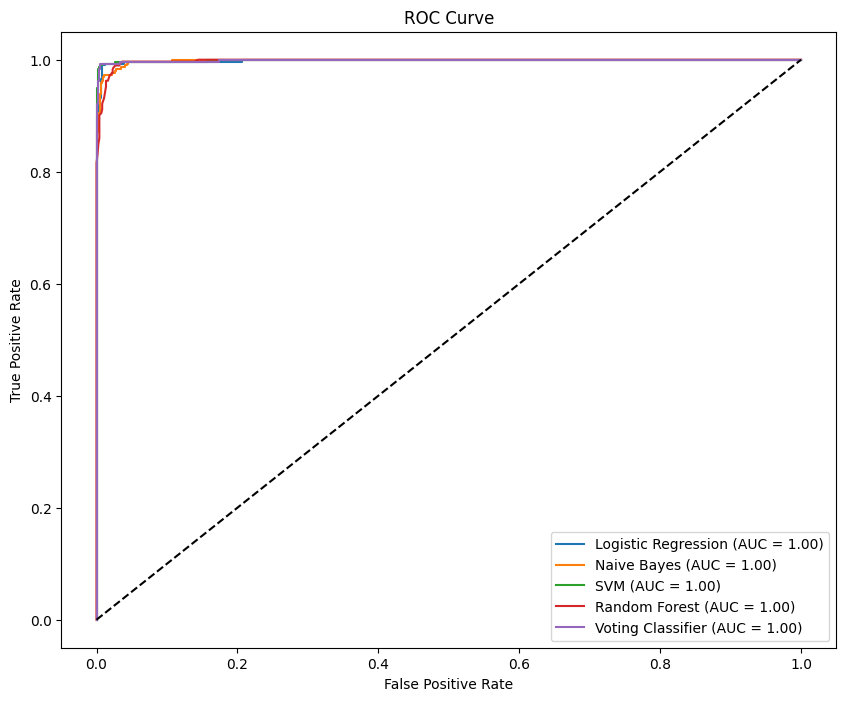

In [23]:
# Visualize ROC Curve for all models
plt.figure(figsize=(10, 8))
for model_name, model in zip(results.keys(), [lr, nb, svm, rf, voting_clf]):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]["ROC AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-24-0e9292605821>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette=['#FF6347', '#4682B4'])


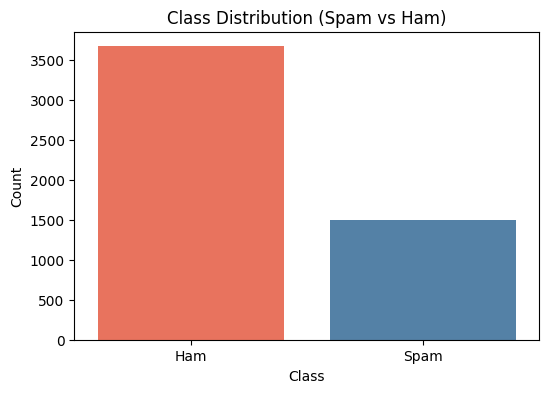

In [24]:
# 1. Class Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette=['#FF6347', '#4682B4'])
plt.title('Class Distribution (Spam vs Ham)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

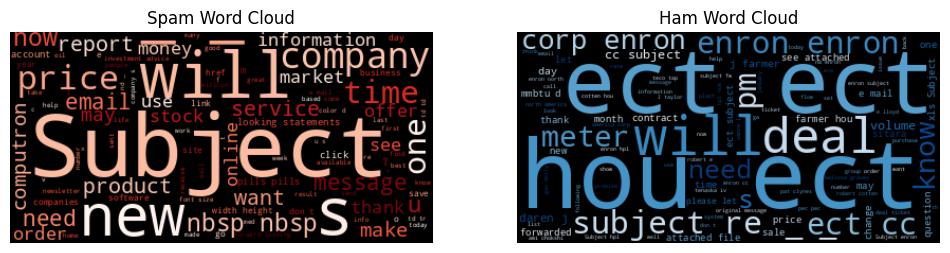

In [25]:
# 2. WordClouds for Spam and Ham Messages
spam_text = " ".join(text for text in data[data['label'] == 1]['text'])
ham_text = " ".join(text for text in data[data['label'] == 0]['text'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
spam_wc = WordCloud(width=400, height=200, max_words=100, background_color='black', colormap='Reds').generate(spam_text)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
ham_wc = WordCloud(width=400, height=200, max_words=100, background_color='black', colormap='Blues').generate(ham_text)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()



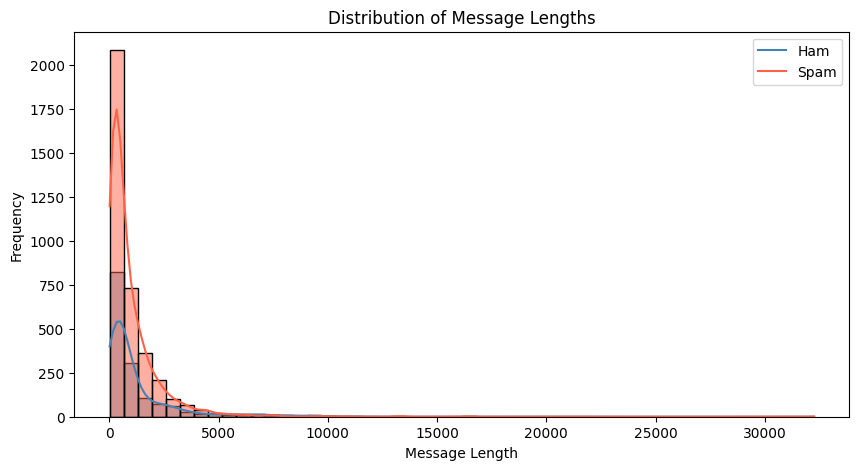

In [26]:
# 3. Distribution of Message Lengths in Spam and Ham
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='text_length', hue='label', bins=50, kde=True, palette=['#FF6347', '#4682B4'])
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'])
plt.show()

<Figure size 500x500 with 0 Axes>

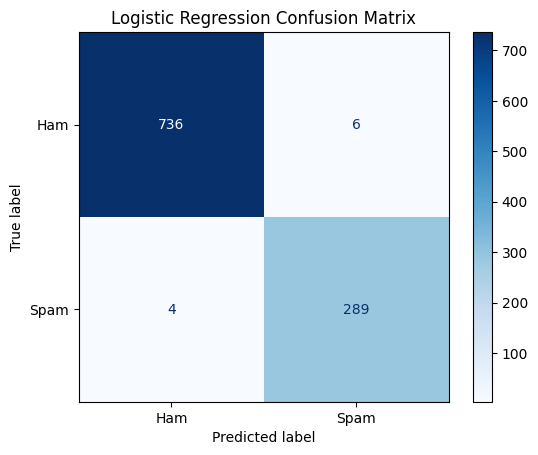

<Figure size 500x500 with 0 Axes>

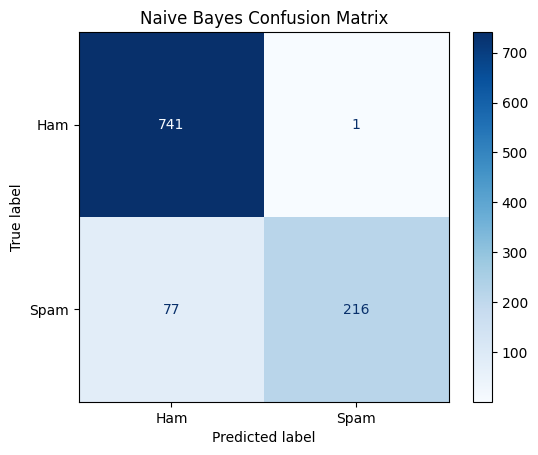

<Figure size 500x500 with 0 Axes>

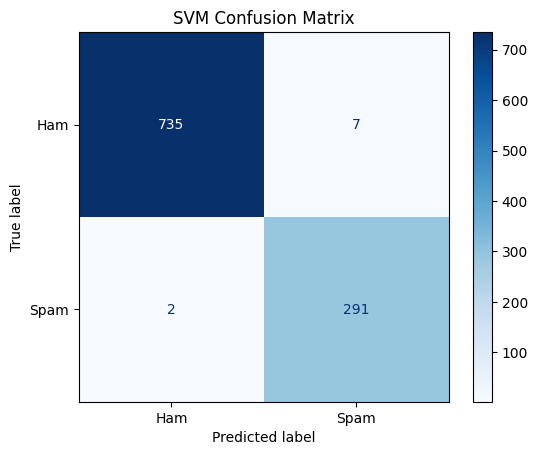

<Figure size 500x500 with 0 Axes>

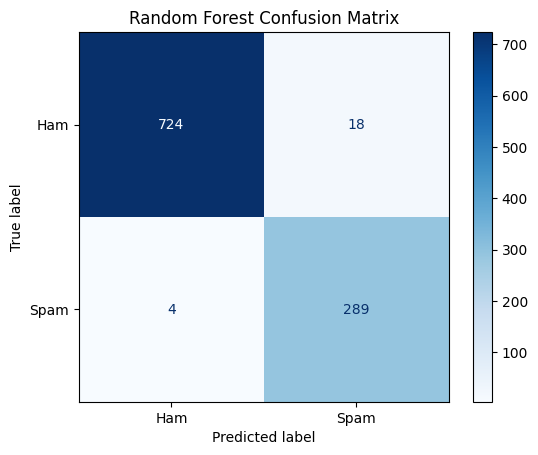

<Figure size 500x500 with 0 Axes>

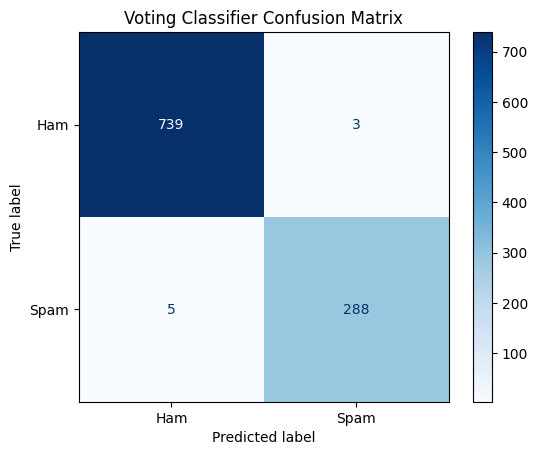

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize confusion matrices for each model
for model_name, model in zip(results.keys(), [lr, nb, svm, rf, voting_clf]):
    plt.figure(figsize=(5, 5))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, display_labels=['Ham', 'Spam'], cmap='Blues')
    disp.ax_.set_title(f'{model_name} Confusion Matrix')
    plt.show()


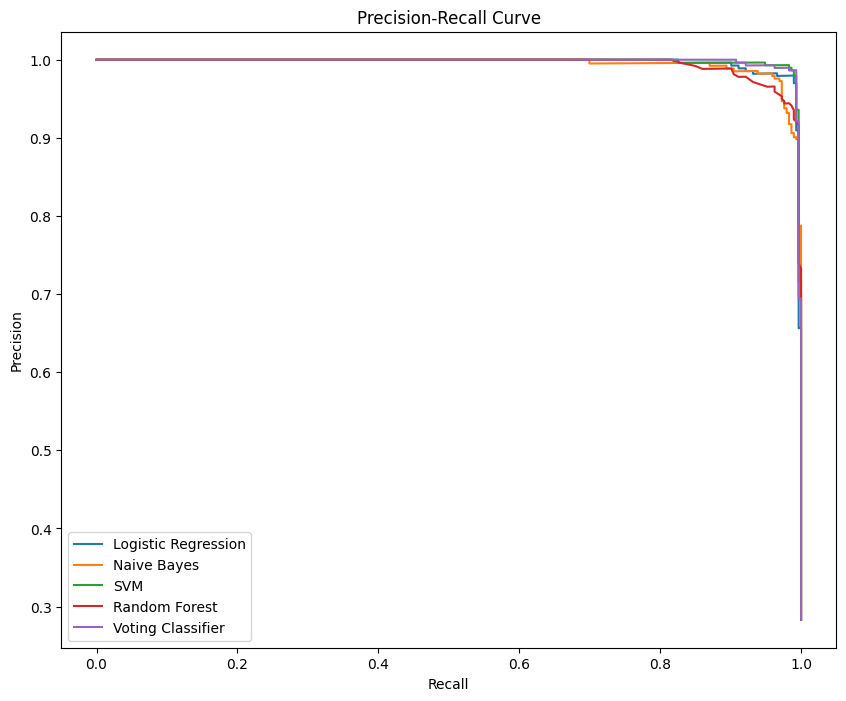

In [28]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
for model_name, model in zip(results.keys(), [lr, nb, svm, rf, voting_clf]):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
    plt.plot(recall, precision, label=f'{model_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


<ipython-input-29-52480ea00701>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


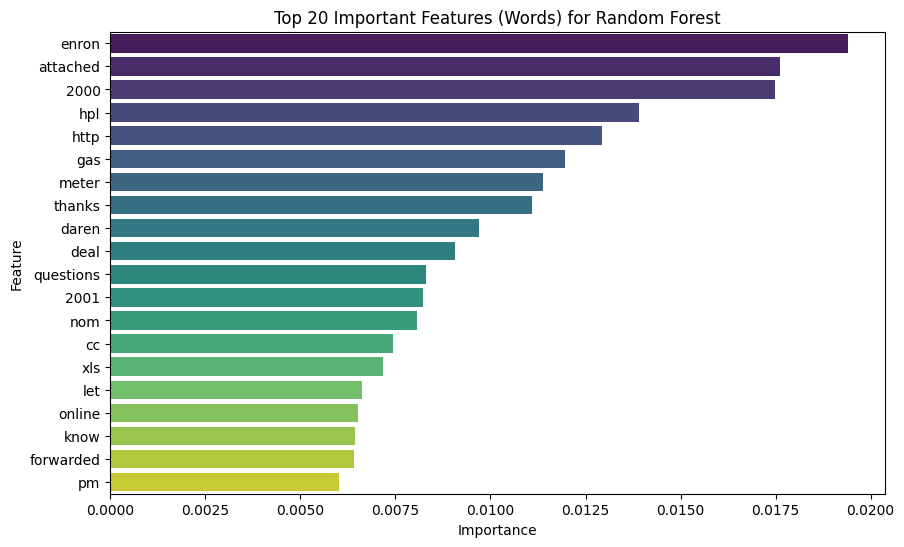

In [29]:
# Get feature importance from the Random Forest
feature_importances = rf.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 20 Important Features (Words) for Random Forest')
plt.show()


In [30]:
# Find misclassified examples for Logistic Regression
misclassified = X_test[(y_test != y_pred_lr)]
misclassified_labels = y_test[(y_test != y_pred_lr)]

misclassified_df = pd.DataFrame({'Text': misclassified, 'Actual Label': misclassified_labels, 'Predicted Label': y_pred_lr[(y_test != y_pred_lr)]})
print("Some Misclassified Examples:")
print(misclassified_df.head(5))


Some Misclassified Examples:
                                                   Text  Actual Label  \
1057  Subject: re : re : re : your document\r\npleas...             1   
239   Subject: long time\r\ncustomer id : 615\r\nord...             1   
2858  Subject: important video announcement\r\ni hav...             0   
746   Subject: fw : men & cars\r\nbecause i ' m a ma...             0   
586                     Subject: get a date tonight\r\n             1   

      Predicted Label  
1057                0  
239                 0  
2858                1  
746                 1  
586                 0  


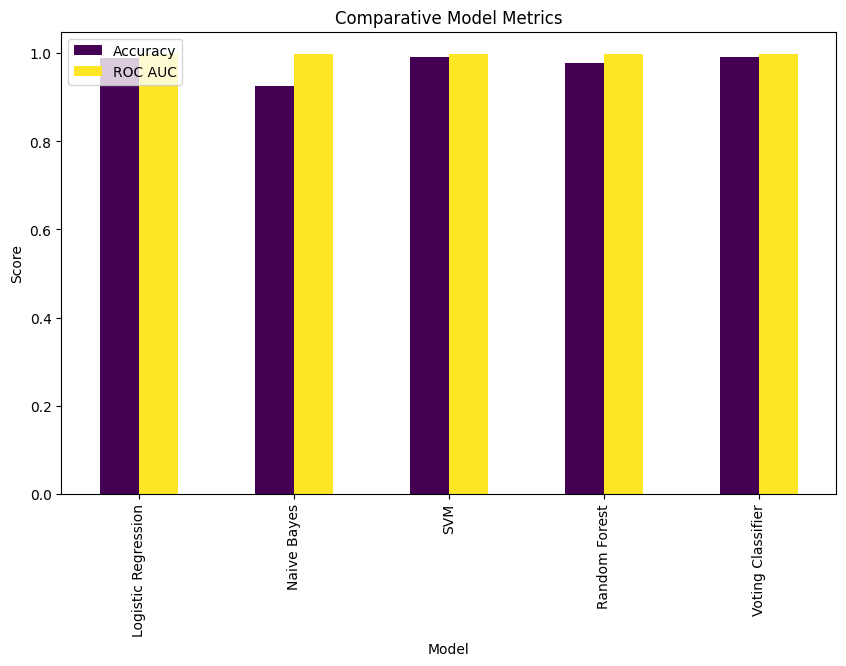

In [31]:
# Example dataframe for storing metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'Voting Classifier'],
    'Accuracy': [accuracy_lr, accuracy_nb, accuracy_svm, accuracy_rf, accuracy_voting],
    'ROC AUC': [roc_auc_lr, roc_auc_nb, roc_auc_svm, roc_auc_rf, roc_auc_voting]
    # You can add precision, recall, f1-score if calculated
})

# Plot
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparative Model Metrics')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.show()


<ipython-input-32-baef03cc6038>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


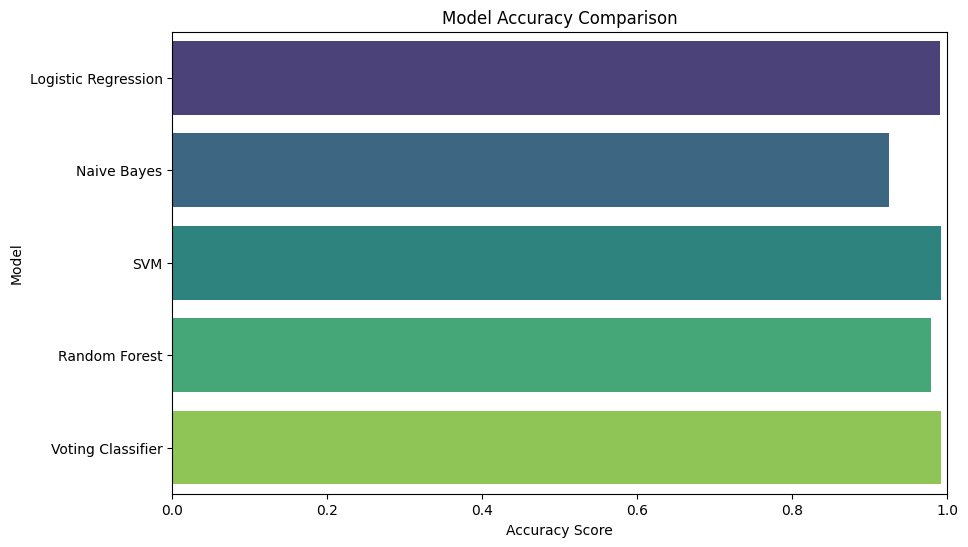

In [32]:
# Define accuracy scores for each model (example values from previous calculations)
model_accuracies = {
    'Logistic Regression': accuracy_lr,
    'Naive Bayes': accuracy_nb,
    'SVM': accuracy_svm,
    'Random Forest': accuracy_rf,
    'Voting Classifier': accuracy_voting
}

# Convert to DataFrame for better visualization
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0, 1)  # Since accuracy is between 0 and 1
plt.show()
